In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pyhomogeneity as hg

In [11]:
#Get BTC data
start = '2018-01-01'
end = '2023-01-01'
data = yf.download('BTC-USD', start=start, end=end,interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [12]:
# Compute deviation from last period price (P_t - P_t-1)
data['deviation'] = data.Close.diff()
data.head()

,Open,High,Low,Close,Adj Close,Volume,deviation
Date,,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000,NaN
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192,1324.899414
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160,218.900391
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744,398.200195
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072,1830.299805


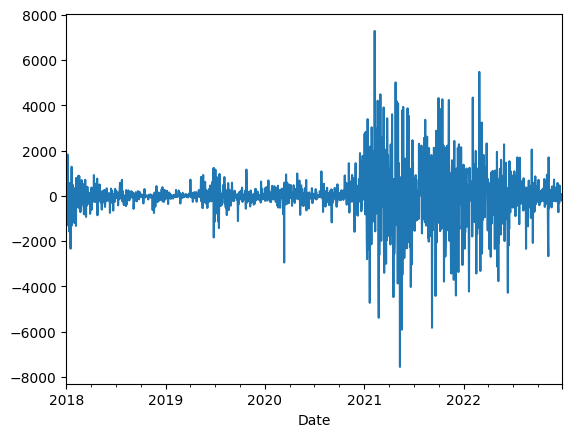

In [13]:
# Visualizing
data.deviation.plot()
plt.show()

In [14]:
# Homogeneity aanalysis
result = hg.pettitt_test(data['deviation'])
print(result)

Pettitt_Test(h=False, cp='2021-10-20', p=0.2529, U=45332.0, avg=mean(mu1=37.70578943961635, mu2=-113.14723076372998))


In [23]:
#Exporting the df

exporting_df = data.loc[:,'deviation']
exporting_df = exporting_df.dropna()
exporting_df.to_csv('exporting_deviation.csv', index = True, index_label="Date")

In [15]:
#Augmented Dickey-Fuller test
X = data.deviation.dropna()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))


ADF Statistic: -8.370057
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
